## 自我中心图(Ego 图)

[参考文档](https://networkx.org/documentation/stable/auto_examples/drawing/plot_ego_graph.html)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

from operator import itemgetter

### 创建 Barabási–Albert 无标度网络

n个节点逐渐生长, 新节点与degree高的旧节点产生m条连接

In [2]:
n = 1000
m = 2
seed = 20532
G = nx.barabasi_albert_graph(n, m, seed=seed)

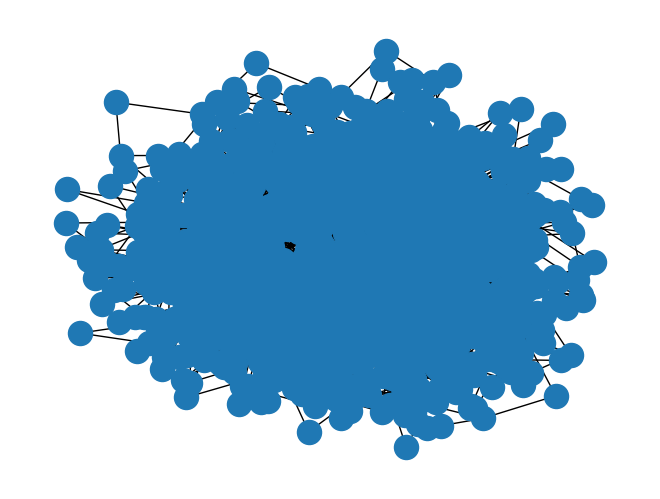

In [3]:
pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos)

找到degree最大的主节点

In [4]:
largest_hub, degree = sorted(G.degree(), key=itemgetter(1))[-1]

print(f'最大主节点为 {largest_hub} 号节点, degree = {degree}')

最大主节点为 4 号节点, degree = 88


找到以主节点为中心的邻域子图(Ego Graph)

In [5]:
nx.ego_graph?

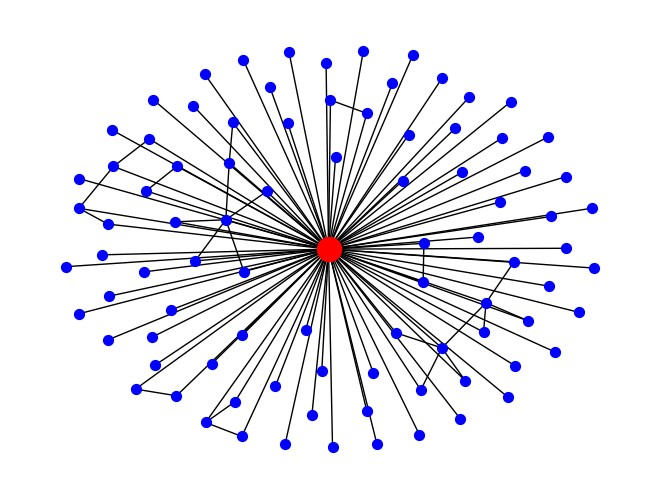

In [6]:
hub_ego = nx.ego_graph(G, largest_hub, radius=1)

pos = nx.spring_layout(hub_ego, seed=seed)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)

# 大红显示主节点
options = {'node_size': 300, 'node_color': 'r'}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)

plt.show()
